In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

SMALL_SIZE = 18
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [2]:
hrdiag_all = np.loadtxt('hrdiag_all.csv', delimiter = ",")
hrdiag_new = np.loadtxt('hrdiag_new.csv', delimiter = ",")
hrdiag_blap = np.loadtxt('hrdiag_blap.csv', delimiter = ",")

In [3]:
mg = hrdiag_all[:,0]
bp_rp = hrdiag_all[:,1]
mg_new = hrdiag_new[:,0]
bp_rp_new = hrdiag_new[:,1]
mg_blap = hrdiag_blap[:,0]
bp_rp_blap = hrdiag_blap[:,1]

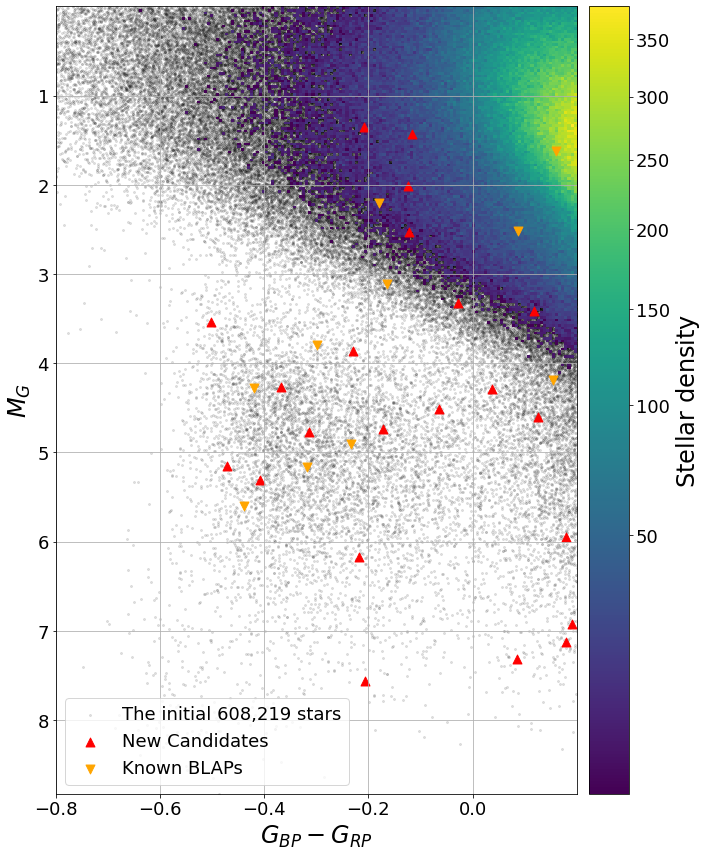

In [18]:
fig, ax = plt.subplots(figsize=(10, 12))
# only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(bp_rp, mg, alpha=0.1, s=4, color='k', zorder=0, label='The initial 608,219 stars')
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlim(left=-0.8)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_G$')
cb.set_label("$\mathrm{Stellar~density}$")
ax.scatter(bp_rp_new, mg_new, alpha=1.0, s=80, color='red', marker='^', zorder=1, label='New Candidates')
ax.scatter(bp_rp_blap, mg_blap, alpha=1.0, s=80, color='orange', marker='v', zorder=2, label='Known BLAPs')
plt.tight_layout()
plt.grid()
plt.legend(loc='lower left')
ax.set_rasterization_zorder(2)
plt.savefig('hrdiag.png')
plt.savefig('hrdiag.pdf')
plt.show()